In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

filename = '.\\Machine_learning_code\\data\\tennis\\Wimbledon-men-2013.csv'
df = pd.read_csv(filename)

# Transform CSV into raw data frame 
raw_data = df.values
cols = df.shape[1]
print('Number of cols: ', cols)
cols = range(2,42)
X = raw_data[:,cols]
X

# Extracting attribute names
attributeNames = np.asarray(df.columns[cols])

# Extracting classes for Y matrix to identify player
classLabels = raw_data[:,0] # Taking first column of data set and checking for player stats

# Determining how many unique players played in tournament
classNames = np.unique(classLabels)


# Assigning each of the player a number
classDict = dict(zip(classNames, range(len(classNames))))
print("Players with assigned numbers: ", classDict)

# Switching names to numbers into y matrix
y = np.array([classDict[cl] for cl in classLabels])
y

# Determinig size of the data set X
N,M = X.shape
C = len(classNames)

print('Dimensions(N,M,C) of the X matrix', N,M,C)

X_c = X.copy()
y_c = y.copy()

# attributeNames_c = attributeNames.copy()
# i=5
# j=6
# plt.title('Players classification')
# for c in range(len(classNames)):
#     idx = y_c == c
#     plt.scatter(
#         x=X_c[idx,i], y=X_c[idx,j], label = classNames[c], alpha = 0.5, s=50
#     )

# plt.legend()



Number of cols:  42
Players with assigned numbers:  {'A.Haider-Maurer': 0, 'A.Kuznetsov': 1, 'A.Mannarino': 2, 'A.Ramos': 3, 'A.Seppi': 4, 'A.Ungur': 5, 'B.Becker': 6, 'B.Kavcic': 7, 'B.Reynolds': 8, 'B.Tomic': 9, 'D.Brands': 10, 'D.Brown': 11, 'D.Ferrer': 12, 'D.Istomin': 13, 'D.Kudla': 14, 'D.Tursunov': 15, 'E.Roger-Vasselin': 16, 'F.Fognini': 17, 'F.Lopez': 18, 'F.Verdasco': 19, 'G.Dimitrov': 20, 'G.Elias': 21, 'G.Pella': 22, 'G.Simon': 23, 'G.Zemlja': 24, 'H.Zeballos': 25, 'I.Dodig': 26, 'I.Sijsling': 27, 'J-W.Tsonga': 28, 'J.Blake': 29, 'J.Duckworth': 30, 'J.Isner': 31, 'J.Janowicz': 32, 'J.Levine': 33, 'J.Melzer': 34, 'J.Monaco': 35, 'J.Reister': 36, 'J.Struff': 37, 'J.Tipsarevic': 38, 'J.Ward': 39, 'K.Anderson': 40, 'K.De Schepper': 41, 'K.Edmund': 42, 'K.Nishikori': 43, 'L.Hewitt': 44, 'L.Kubot': 45, 'L.Lacko': 46, 'L.Mayer': 47, 'M.Baghdatis': 48, 'M.Gicquel': 49, 'M.Klizan': 50, 'M.Llodra': 51, 'M.Matosevic': 52, 'M.Raonic': 53, 'M.Youzhny': 54, 'N.Almagro': 55, 'N.Djokovic':

C:\Users\msi\AppData\Local\Temp\ipykernel_828\1696279786.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from scipy.linalg import svd

filename = '.\\Machine_learning_code\\data\\tennis\\Wimbledon-men-2013.csv'
df = pd.read_csv(filename)

raw_data = df.values
classLabels = df.columns.tolist()
cols = df.columns[2:]
print(classLabels)
print(len(classLabels))
classNames = sorted(set(classLabels))
classDict = dict(zip(classNames,range(len(classLabels))))

# Exctract y vector and convert to NumPy array
y = np.asarray([classDict[value] for value in classLabels])
print(y)
# Extract data to matrix X 
X = df[cols].values

M=len(X)
N=len(y)
C=len(df['Player1'])

print(N,M,C)

# Substract mean value from data
Y = X - np.ones((M,1)) * X.mean(0)
print(len(Y))

print(X.shape)
print(X.mean(1).shape)  

# PCA by SVD
Y = np.nan_to_num(Y, nan=0)
U,S,Vh = svd(Y, full_matrices = False)
V=Vh.T

# Projecting centered data onto principal component space
Z = Y@V
print(len(Z))
# Indices for plotting
i=0
j=1

# # Plot PCA
# f = plt.figure()
# plt.title('Tennis Data: PCA')
# for c in range(C):
#     # select indices belonging to class c:
#     class_mask = y == c
#     #plt.plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.5)
#     plt.plot(Z[class_mask,i],Z[class_mask,j],'o',alpha=0.5)
# plt.legend(classNames)
# plt.xlabel("PC{0}".format(i + 1))
# plt.ylabel("PC{0}".format(j + 1))


C:\Users\msi\AppData\Local\Temp\ipykernel_17780\3884024730.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


['Player1', 'Player2', 'Round', 'Result', 'FNL.1', 'FNL.2', 'FSP.1', 'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1', 'BPC.1', 'BPW.1', 'NPA.1', 'NPW.1', 'TPW.1', 'ST1.1', 'ST2.1', 'ST3.1', 'ST4.1', 'ST5.1', 'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2', 'ACE.2', 'DBF.2', 'WNR.2', 'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2', 'NPW.2', 'TPW.2', 'ST1.2', 'ST2.2', 'ST3.2', 'ST4.2', 'ST5.2']
42
[18 19 21 20  8  9 10 12 22 24  0  6 40 38  2  4 14 16 36 26 28 30 32 34
 11 13 23 25  1  7 41 39  3  5 15 17 37 27 29 31 33 35]
42 114 114
114
(114, 40)
(114,)
114


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from scipy.linalg import svd
from scipy.stats import shapiro

filename = '.\\Machine_learning_code\\data\\tennis\\Wimbledon-men-2013.csv'
df = pd.read_csv(filename)
df = df.drop(columns=['Player1','Player2'])

for column in df.columns:
    stat, p = shapiro(df[column])
    print(f"Shapiro-Wilk test for column '{column}':")
    print(f"Test Statistic: {stat}, p-value: {p}")
    if p > 0.05:
        print("Attribute is likely normally distributed.")
    else:
        print("Attribute is not normally distributed.")
    print()



Shapiro-Wilk test for column 'Round':
Test Statistic: 0.7192587322819908, p-value: 1.8213140747339423e-13
Attribute is not normally distributed.

Shapiro-Wilk test for column 'Result':
Test Statistic: 0.6359454445484484, p-value: 2.099719770401584e-15
Attribute is not normally distributed.

Shapiro-Wilk test for column 'FNL.1':
Test Statistic: 0.739623080473513, p-value: 6.239095462102664e-13
Attribute is not normally distributed.

Shapiro-Wilk test for column 'FNL.2':
Test Statistic: 0.7315100365448868, p-value: 3.7904816691718333e-13
Attribute is not normally distributed.

Shapiro-Wilk test for column 'FSP.1':
Test Statistic: 0.9881450618605835, p-value: 0.42169228004183285
Attribute is likely normally distributed.

Shapiro-Wilk test for column 'FSW.1':
Test Statistic: 0.955917456385977, p-value: 0.0008686111858465826
Attribute is not normally distributed.

Shapiro-Wilk test for column 'SSP.1':
Test Statistic: 0.9881450618605827, p-value: 0.42169228004177306
Attribute is likely norma

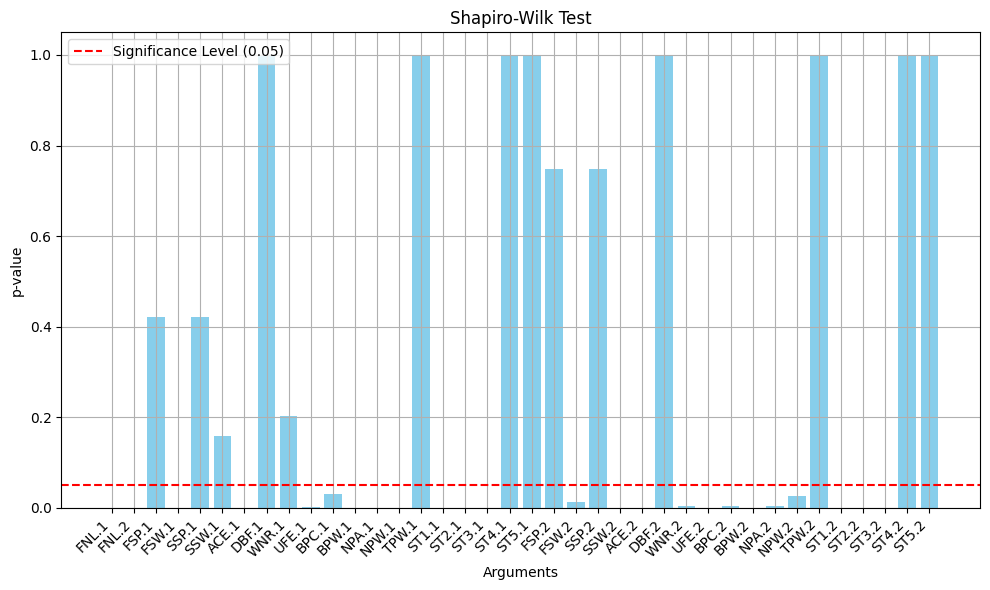

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

def shapiro_test_and_plot(df):
    """
    Perform Shapiro-Wilk test on each column of a DataFrame and create a plot of p-values.
    
    Parameters:
        df (DataFrame): The pandas DataFrame.
        
    Returns:
        None
    """
    p_values = {}  # Dictionary to store p-values

    # Perform Shapiro-Wilk test on each column
    for column in df.columns:
        stat, p = shapiro(df[column])
        p_values[column] = p
    #p_values = dict(sorted(p_values.items()))
    # Create a plot of p-values
    plt.figure(figsize=(10, 6))
    plt.bar(p_values.keys(), p_values.values(), color='skyblue')
    plt.xlabel('Arguments')
    plt.ylabel('p-value')
    plt.title('Shapiro-Wilk Test')
    plt.xticks(rotation=45, ha='right')
    plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

filename = '.\\Machine_learning_code\\data\\tennis\\Wimbledon-men-2013.csv'
df = pd.read_csv(filename)
df = df.drop(columns=['Player1','Player2','Result','Round'])

shapiro_test_and_plot(df)


C:\Users\msi\AppData\Local\Temp\ipykernel_17780\4288179859.py:22: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  tennis12= tennis12.apply(pd.to_numeric, errors='ignore')


Correlation Matrix:
          FNL       FSP       FSW       SSP       SSW       ACE       DBF  \
FNL  1.000000  0.151965  0.352014 -0.151965  0.278756  0.452339 -0.107775   
FSP  0.151965  1.000000  0.274030 -1.000000 -0.417761  0.126170 -0.310412   
FSW  0.352014  0.274030  1.000000 -0.274030  0.575065  0.553391  0.175505   
SSP -0.151965 -1.000000 -0.274030  1.000000  0.417761 -0.126170  0.310412   
SSW  0.278756 -0.417761  0.575065  0.417761  1.000000  0.281744  0.254083   
ACE  0.452339  0.126170  0.553391 -0.126170  0.281744  1.000000  0.167295   
DBF -0.107775 -0.310412  0.175505  0.310412  0.254083  0.167295  1.000000   
WNR  0.505475  0.057455  0.745849 -0.057455  0.565967  0.750326  0.215465   
UFE -0.024112 -0.126287  0.495321  0.126287  0.436047  0.176735  0.504529   
BPC  0.666518  0.034281  0.310905 -0.034281  0.274350  0.290822  0.011959   
BPW  0.751151  0.058938  0.091365 -0.058938  0.100542  0.155668 -0.081640   
NPA  0.146155  0.016536  0.489974 -0.016536  0.403575  0

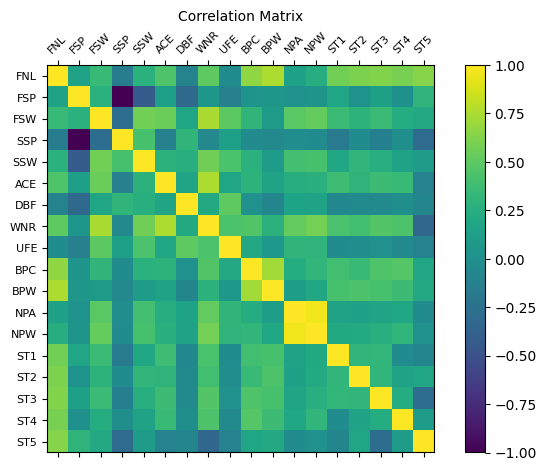

In [40]:
# For summary statistics it doesnt really matter if something was done by player one or two 
# Creating new dataframe with attributes of both players in one colummn
from matplotlib.pyplot import cm

wimbledon_path = ".\\Machine_learning_code\\data\\tennis\\Wimbledon-men-2013_mod.csv"
tennis = pd.read_csv(wimbledon_path)

tennis1 = tennis.drop(columns=['Player1','Player2','Round','Result','FNL.2','FSP.2','FSW.2','SSP.2','SSW.2','ACE.2','DBF.2', \
                               'WNR.2','UFE.2','BPC.2','BPW.2','NPA.2','NPW.2','TPW.2','TPW.1','ST1.2','ST2.2','ST3.2','ST4.2','ST5.2'])

tennis2 = tennis.drop(columns=['Player1','Player2','Round','Result','FNL.1', 'FSP.1','FSW.1','SSP.1','SSW.1','ACE.1','DBF.1', \
                               'WNR.1','UFE.1','BPC.1','BPW.1','NPA.1','NPW.1','TPW.1','TPW.2','ST1.1','ST2.1','ST3.1','ST4.1','ST5.1'])

tennis2.index = tennis1.index
tennis2.columns = tennis1.columns
tennis12 = pd.concat([tennis1.reset_index(drop=True), tennis2.reset_index(drop=True)], axis= 0, ignore_index = True)
tennis12 = tennis12.rename(columns={'FNL.1':'FNL','FSP.1':'FSP','FSW.1':'FSW','SSP.1':'SSP','SSW.1':'SSW','ACE.1':'ACE','DBF.1':'DBF', \
                               'WNR.1':'WNR','UFE.1':'UFE','BPC.1':'BPC','BPW.1':'BPW','NPA.1':'NPA','NPW.1':'NPW','ST1.1':'ST1', \
                                'ST2.1':'ST2','ST3.1':'ST3','ST4.1':'ST4','ST5.1':'ST5'})
tennis12 = tennis12.replace('NA    ', np.nan)
# replace field that's entirely space (or empty) with NaN
tennis12 = tennis12.replace(r'^\s*$', np.nan, regex=True)

tennis12= tennis12.apply(pd.to_numeric, errors='ignore')




print("Correlation Matrix:")
print(tennis12.corr())

f = plt.figure(figsize=(8, 5))
plt.matshow(tennis12.corr(), fignum=f.number,c=cm.gray)
plt.xticks(range(tennis12.select_dtypes(['number']).shape[1]), tennis12.select_dtypes(['number']).columns, fontsize=8, rotation=45)
plt.yticks(range(tennis12.select_dtypes(['number']).shape[1]), tennis12.select_dtypes(['number']).columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10)
plt.show()